In [1]:
#Links:
#https://www.kaggle.com/code/pavansanagapati/ensemble-learning-techniques-tutorial
#https://www.kaggle.com/code/satishgunjal/ensemble-learning-bagging-boosting-stacking
#https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms
#https://www.kaggle.com/code/amrmahmoud123/1-guide-to-ensembling-methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/diabetes.csv')
print(f'Shape of X= {data.shape}')
data.head()

Shape of X= (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Exploratory Data Analysis (EDA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
data.Outcome.value_counts().hvplot.bar(
    title="Disease Count", xlabel='Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (Outcome)

In [7]:
# Checking for messing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [9]:
categorical_val

['Outcome']

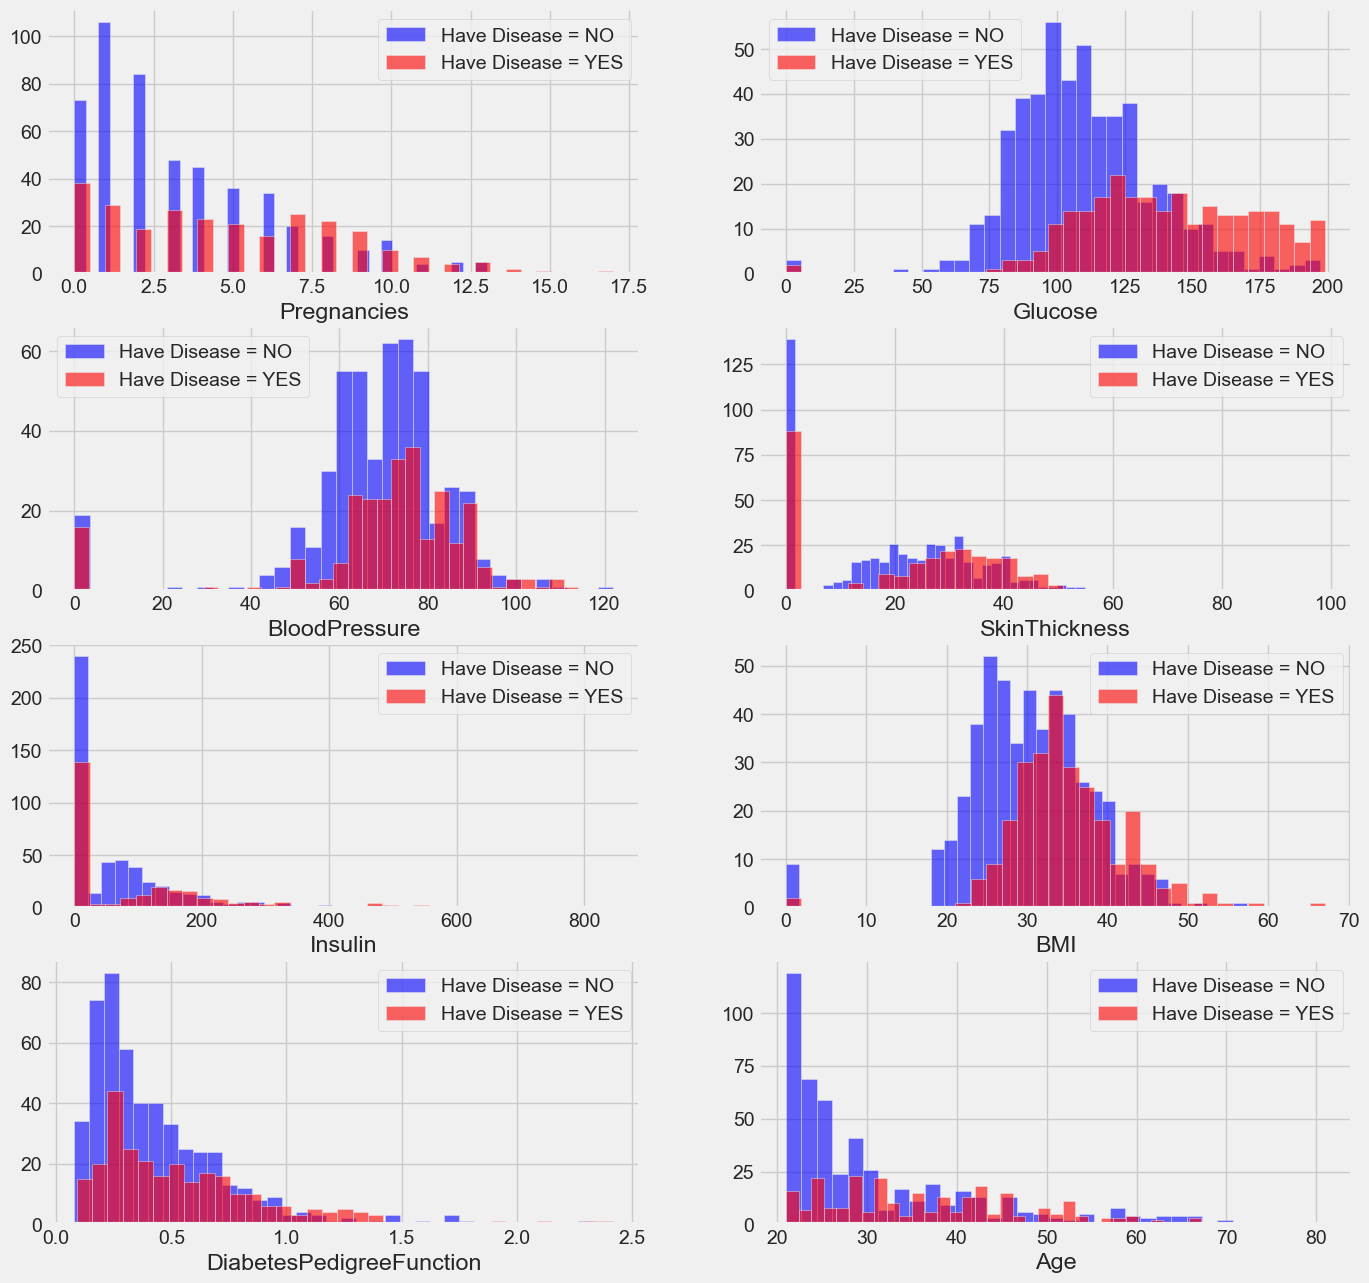

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(4, 2, i)
    data[data["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Disease = NO', alpha=0.6)
    data[data["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

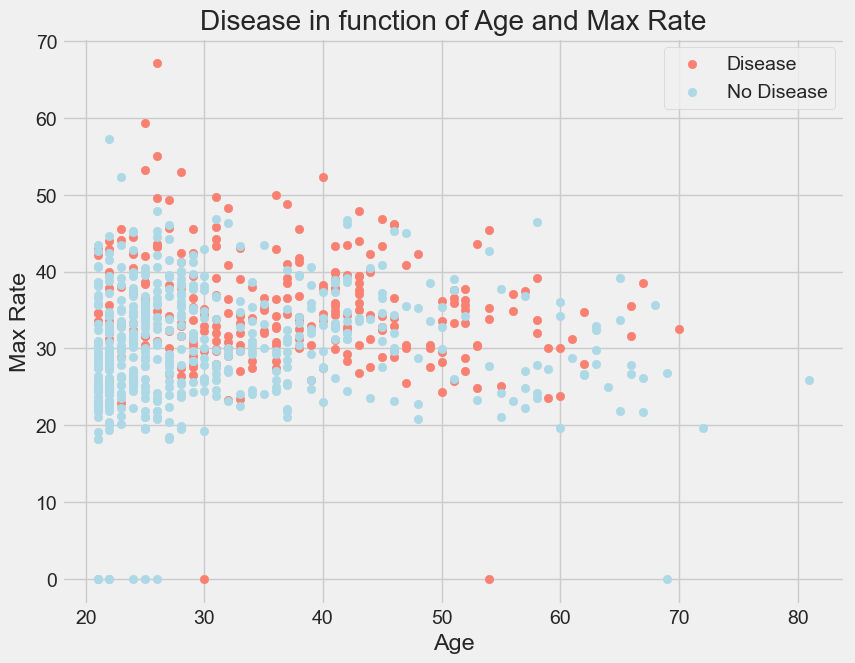

In [11]:
#Age vs. Max Heart Rate for Disease
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.Age[data.Outcome==1],
            data.BMI[data.Outcome==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.Age[data.Outcome==0],
            data.BMI[data.Outcome==0],
            c="lightblue")

# Add some helpful info
plt.title("Disease in function of Age and Max Rate")
plt.xlabel("Age")
plt.ylabel("Max Rate")
plt.legend(["Disease", "No Disease"]);

(9.5, -0.5)

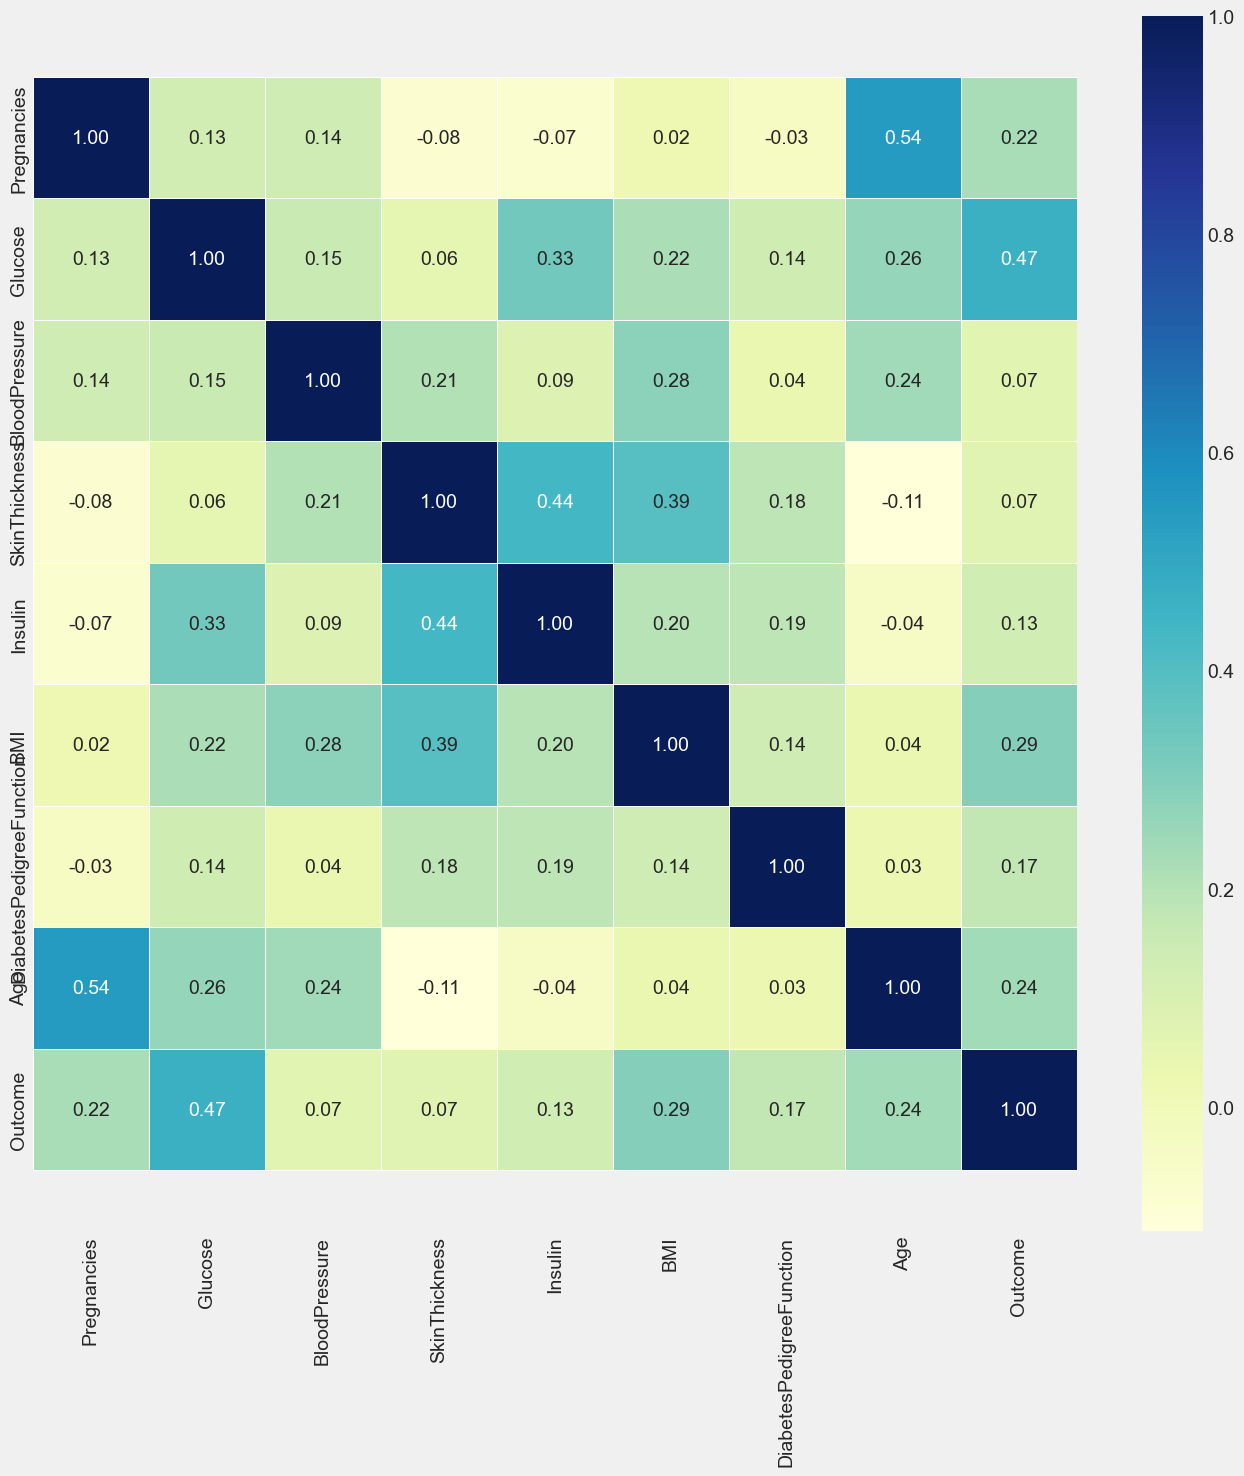

In [12]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
data.drop('Outcome', axis=1).corrwith(data.Outcome).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

In [14]:
#Data Processing
categorical_val.remove('Outcome')
dataset = pd.get_dummies(data, columns = categorical_val)

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [16]:
print(data.columns)
print(dataset.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [18]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,0
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,0
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1


In [19]:
#Models Building
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [20]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)
y = dataset.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

## Logistic Regression

In [21]:
#Parameters:
# penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
# dualbool, default=False
# class_weightdict or ‘balanced’, default=None
# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
# max_iterint, default=100
# multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.77%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.75      0.79       0.78          0.78
recall      0.89   0.59      0.79       0.74          0.79
f1-score    0.85   0.66      0.79       0.75          0.78
support   350.00 187.00      0.79     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[313  37]
 [ 77 110]]

Test Result:
Accuracy Score: 74.46%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.77  0.68      0.74       0.72          0.74
recall      0.87  0.52      0.74       0.69          0.74
f1-score    0.82  0.59      0.74       0.70          0.74
support   150.00 81.00      0.74     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[130  20]
 [ 39  42]]



In [29]:
#Attributes
print("Classes: ",lr_clf.classes_)
print("intercept values: ",lr_clf.intercept_)
print("coef values: ",lr_clf.coef_)
print("No. of features in: ",lr_clf.n_features_in_)
print("Names of features: ",lr_clf.feature_names_in_)
print("n_iter: ",lr_clf.n_iter_)

Classes:  [0 1]
intercept values:  [-0.88907707]
coef values:  [[ 0.45761936  1.14374992 -0.20431342 -0.04052295 -0.07972529  0.71484395
   0.23111448  0.09467515]]
No. of features in:  8
Names of features:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
n_iter:  [5]


In [30]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46


##  K-nearest neighbors

In [ ]:
#Parameters:
# n_neighbors int, default=5
# weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# leaf_size int, default=30
# p int, default=2, euclidean_distance (l2) for p = 2
# metricstr or callable, default=’minkowski’

#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.70%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.76      0.80       0.78          0.79
recall      0.89   0.61      0.80       0.75          0.80
f1-score    0.85   0.68      0.80       0.77          0.79
support   350.00 187.00      0.80     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[313  37]
 [ 72 115]]

Test Result:
Accuracy Score: 75.76%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.70      0.76       0.74          0.75
recall      0.87  0.54      0.76       0.71          0.76
f1-score    0.82  0.61      0.76       0.72          0.75
support   150.00 81.00      0.76     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[131  19]
 [ 37  44]]



In [36]:
#Attributes
print("Classes: ",knn_clf.classes_)
print("effective_metric: ",knn_clf.effective_metric_)
print("effective_metric_params: ",knn_clf.effective_metric_params_)
print("No. of features in: ",knn_clf.n_features_in_)
print("Names of features: ",knn_clf.feature_names_in_)

Classes:  [0 1]
effective_metric:  euclidean
effective_metric_params:  {}
No. of features in:  8
Names of features:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [37]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76


## Support Vector machine

In [38]:
#Parameters
# Cfloat, default=1.0
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# degreeint, default=3
# gamma{‘scale’, ‘auto’} or float, default=’scale’
# coef0float, default=0.0
# shrinkingbool, default=True
# class_weightdict or ‘balanced’, default=None
# max_iterint, default=-1
# decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [39]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.87%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.83   0.83      0.83       0.83          0.83
recall      0.93   0.64      0.83       0.79          0.83
f1-score    0.88   0.72      0.83       0.80          0.82
support   350.00 187.00      0.83     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[325  25]
 [ 67 120]]

Test Result:
Accuracy Score: 75.32%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.69      0.75       0.73          0.75
recall      0.87  0.54      0.75       0.70          0.75
f1-score    0.82  0.61      0.75       0.71          0.75
support   150.00 81.00      0.75     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[130  20]
 [ 37  44]]



In [47]:
#Attributes
print("Classes: ",svm_clf.classes_)
print("class_weight: ",svm_clf.class_weight_)
#print("dual_coef: ",svm_clf.dual_coef_)
print("fit_status: ",svm_clf.fit_status_)
print("support: ",svm_clf.support_)
print("support_vectors: ",svm_clf.support_vectors_)
print("n_support: ",svm_clf.n_support_)

Classes:  [0 1]
class_weight:  [1. 1.]
fit_status:  0
support:  [  2   6   8  14  15  16  19  21  23  24  28  31  34  38  40  42  43  45
  48  50  53  56  58  60  61  62  63  66  68  73  74  75  87  96 103 111
 114 115 116 117 119 122 123 136 152 153 162 163 166 167 169 170 171 173
 174 176 177 179 181 183 184 186 190 193 194 195 199 200 202 204 209 210
 215 219 224 232 237 241 243 244 245 257 267 268 272 278 282 287 299 302
 304 305 306 312 316 317 319 322 325 327 329 332 342 348 357 359 363 365
 366 368 370 380 382 388 390 398 400 403 407 409 410 412 413 414 417 420
 425 433 434 435 436 440 448 449 458 460 462 465 469 476 481 483 485 487
 488 494 500 502 510 512 514 518 520 536  11  13  18  26  27  33  35  36
  39  41  44  49  52  54  55  67  70  71  76  80  83  84  85  89 102 105
 107 108 109 113 127 128 129 135 140 141 142 143 146 147 150 151 158 159
 160 164 165 180 182 188 189 191 203 206 207 211 213 216 217 218 223 225
 227 229 231 233 234 235 242 248 249 250 259 262 269 279 281

In [48]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\446375890.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32


## Decision Tree Classifier

In [52]:
#Parameters
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# splitter{“best”, “random”}, default=”best”
# max_depthint, default=None
# min_samples_splitint or float, default=2
# min_samples_leafint or float, default=1
# max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
# max_leaf_nodesint, default=None

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [51]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42,criterion="entropy",max_features="sqrt")
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   350.00 187.00      1.00     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[350   0]
 [  0 187]]

Test Result:
Accuracy Score: 64.50%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.72  0.49      0.65       0.61          0.64
recall      0.74  0.47      0.65       0.60          0.65
f1-score    0.73  0.48      0.65       0.61          0.64
support   150.00 81.00      0.65     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[111  39]
 [ 43  38]]



In [58]:
#Attributes
print("Classes: ",tree_clf.classes_)
print("max_features: ",tree_clf.max_features_)
print("n_classes: ",tree_clf.n_classes_)
print("No. of features in: ",tree_clf.n_features_in_)
print("Names of features: ",tree_clf.feature_names_in_)
print("n_outputs: ",tree_clf.n_outputs_)
print("tree: ",tree_clf.tree_)

Classes:  [0 1]
max_features:  2
n_classes:  2
No. of features in:  8
Names of features:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
n_outputs:  1
tree:  <sklearn.tree._tree.Tree object at 0x000001EE4E3459D0>


In [59]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\490717132.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50


## Random Forest

In [60]:
#Parameters
# n_estimators int, default=100
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# max_depthint, default=None
# min_samples_split int or float, default=2
# min_samples_leaf int or float, default=1
# min_weight_fraction_leaffloat, default=0.0
# max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
# bootstrap bool, default=True
# oob_score bool or callable, default=False
# class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True,criterion="gini",min_samples_split=4,max_features="sqrt")
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.81%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   0.99      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   350.00 187.00      1.00     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[350   0]
 [  1 186]]

Test Result:
Accuracy Score: 76.62%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.79  0.71      0.77       0.75          0.76
recall      0.87  0.57      0.77       0.72          0.77
f1-score    0.83  0.63      0.77       0.73          0.76
support   150.00 81.00      0.77     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[131  19]
 [ 35  46]]



In [65]:
#Attributes
print("Classes: ",rf_clf.classes_)
print("base_estimator: ",rf_clf.base_estimator_)
print("estimators: ",rf_clf.estimators_)

Classes:  [0 1]
base_estimator:  DecisionTreeClassifier()
estimators:  [DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=981941508), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=2022608600), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=1622077524), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=911136331), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=1511667808), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=116630414), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=1967164015), DecisionTreeClassifier(max_features='sqrt', min_samples_split=4,
                       random_state=897426480), DecisionTreeClassifi

In [66]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\2869621319.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50
4,Random Forest Classifier,99.81,76.62


## XGBoost Classifer

In [67]:
# Parameters
# booster [default= gbtree ]
# verbosity [default=1]
# validate_parameters [default to false, except for Python, R and CLI interface]
# nthread [default to maximum number of threads available if not set]
# num_feature [set automatically by XGBoost, no need to be set by user]

# eta [default=0.3, alias: learning_rate]
# gamma [default=0, alias: min_split_loss]
# max_depth [default=6]
# min_child_weight [default=1]
# max_delta_step [default=0]
# sampling_method [default= uniform]

#https://xgboost.readthedocs.io/en/stable/parameter.html

In [68]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False,booster="gbtree")
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   350.00 187.00      1.00     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[350   0]
 [  0 187]]

Test Result:
Accuracy Score: 73.16%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.77  0.64      0.73       0.71          0.72
recall      0.84  0.53      0.73       0.69          0.73
f1-score    0.80  0.58      0.73       0.69          0.72
support   150.00 81.00      0.73     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[126  24]
 [ 38  43]]



In [69]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\183197377.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50
4,Random Forest Classifier,99.81,76.62
5,XGBoost Classifier,100.00,73.16


## AdaBoostClassifier

In [70]:
#Parameters
# estimator object, default=None
# n_estimators int, default=50
# learning_ratefloat, default=1.0
# algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
# random_state int, RandomState instance or None, default=None
# base_estimatorobject, default=None

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [71]:
from sklearn.ensemble import AdaBoostClassifier

AdaModel = AdaBoostClassifier(n_estimators=100,learning_rate=1,algorithm="SAMME.R")
AdaModel.fit(X_train, y_train)

print_score(AdaModel, X_train, y_train, X_test, y_test, train=True)
print_score(AdaModel, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.85      0.87       0.86          0.87
recall      0.93   0.76      0.87       0.85          0.87
f1-score    0.90   0.80      0.87       0.85          0.87
support   350.00 187.00      0.87     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[324  26]
 [ 44 143]]

Test Result:
Accuracy Score: 74.89%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.67      0.75       0.73          0.74
recall      0.85  0.57      0.75       0.71          0.75
f1-score    0.81  0.61      0.75       0.71          0.74
support   150.00 81.00      0.75     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[127  23]
 [ 35  46]]



In [74]:
#Attributes
print("Classes: ",AdaModel.classes_)
print("base_estimator: ",AdaModel.base_estimator_)

Classes:  [0 1]
base_estimator:  DecisionTreeClassifier(max_depth=1)


In [75]:
test_score = accuracy_score(y_test, AdaModel.predict(X_test)) * 100
train_score = accuracy_score(y_train, AdaModel.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaModel Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\268253469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50
4,Random Forest Classifier,99.81,76.62
5,XGBoost Classifier,100.00,73.16
6,AdaModel Classifier,86.96,74.89


## Gradient-Boost Algorithm

In [76]:
#Parameters
# loss{‘log_loss’, ‘exponential’}, default=’log_loss’
# learning_ratefloat, default=0.1
# n_estimatorsint, default=100
# subsamplefloat, default=1.0
# criterion{‘friedman_mse’, ‘squared_error’}, default=’friedman_mse’
# min_samples_splitint or float, default=2
# min_samples_leafint or float, default=1
# max_depthint or None, default=3
# max_features{‘sqrt’, ‘log2’}, int or float, default=None

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gbclass = GradientBoostingClassifier(max_depth=2,n_estimators=3,learning_rate=1.0)
gbclass.fit(X_train, y_train)

print_score(gbclass, X_train, y_train, X_test, y_test, train=True)
print_score(gbclass, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.14%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.76      0.79       0.78          0.79
recall      0.90   0.59      0.79       0.75          0.79
f1-score    0.85   0.66      0.79       0.76          0.78
support   350.00 187.00      0.79     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[314  36]
 [ 76 111]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.62      0.71       0.69          0.70
recall      0.85  0.47      0.71       0.66          0.71
f1-score    0.79  0.54      0.71       0.66          0.70
support   150.00 81.00      0.71     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[127  23]
 [ 43  38]]



In [80]:
print("Classes: ",gbclass.classes_)
print("feature_names_in: ",gbclass.feature_names_in_)
print("feature_importances: ",gbclass.feature_importances_)

Classes:  [0 1]
feature_names_in:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
feature_importances:  [0.03113774 0.64725259 0.         0.         0.         0.18615055
 0.02619222 0.1092669 ]


In [81]:
test_score = accuracy_score(y_test, gbclass.predict(X_test)) * 100
train_score = accuracy_score(y_train, gbclass.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["gbclass Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\224331249.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50
4,Random Forest Classifier,99.81,76.62
5,XGBoost Classifier,100.00,73.16
6,AdaModel Classifier,86.96,74.89
7,gbclass Classifier,79.14,71.43


## Naive Bayes Classifier

In [90]:
# Select the features and the target
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [91]:
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(X_train2, y_train2)

print_score(mNB, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(mNB, X_train2, y_train2, X_test2, y_test2, train=False)

Train Result:
Accuracy Score: 59.12%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.69   0.42      0.59       0.55          0.60
recall      0.67   0.44      0.59       0.56          0.59
f1-score    0.68   0.43      0.59       0.56          0.59
support   400.00 214.00      0.59     614.00        614.00
_______________________________________________
Confusion Matrix: 
 [[269 131]
 [120  94]]

Test Result:
Accuracy Score: 59.74%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.69  0.42      0.60       0.55          0.59
recall      0.70  0.41      0.60       0.55          0.60
f1-score    0.69  0.42      0.60       0.55          0.60
support   100.00 54.00      0.60     154.00        154.00
_______________________________________________
Confusion Matrix: 
 [[70 30]
 [32 22]]



In [92]:
test_score = accuracy_score(y_test2, mNB.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, mNB.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["mNB Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_9420\4098750308.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,79.70,75.76
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,64.50
4,Random Forest Classifier,99.81,76.62
5,XGBoost Classifier,100.00,73.16
6,AdaModel Classifier,86.96,74.89
7,gbclass Classifier,79.14,71.43
8,mNB Classifier,59.12,59.74


## Models Hyperparameter Tuning

##  Logistic Regression Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 78.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.75      0.79       0.78          0.79
recall      0.89   0.59      0.79       0.74          0.79
f1-score    0.85   0.66      0.79       0.75          0.78
support   350.00 187.00      0.79     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[313  37]
 [ 76 111]]

Test Result:
Accuracy Score: 74.03%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.77  0.67      0.74       0.72          0.73
recall      0.86  0.52      0.74       0.69          0.74
f1-score    0.81  0.58      0.74       0.70          0.73
support   150.00 81.00      0.74     

In [53]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03


## K-nearest neighbors Hyperparameter Tuning

In [54]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


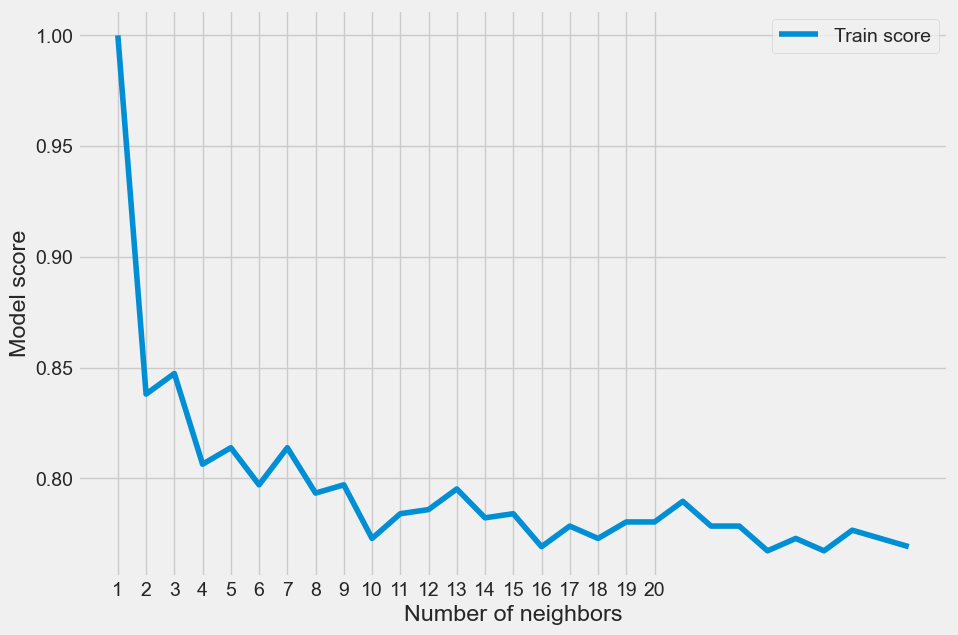

In [55]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.65%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.78   0.78      0.78       0.78          0.78
recall      0.92   0.50      0.78       0.71          0.78
f1-score    0.84   0.61      0.78       0.73          0.76
support   350.00 187.00      0.78     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[323  27]
 [ 93  94]]

Test Result:
Accuracy Score: 73.16%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.74  0.69      0.73       0.72          0.72
recall      0.89  0.43      0.73       0.66          0.73
f1-score    0.81  0.53      0.73       0.67          0.71
support   150.00 81.00      0.73     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[134  16]
 [ 46  35]]



In [57]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_3840\3226921384.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03
1,Tuned K-nearest neighbors,77.65,73.16


## Support Vector Machine Hyperparameter Tuning

In [58]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 78.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.76      0.79       0.78          0.79
recall      0.91   0.57      0.79       0.74          0.79
f1-score    0.85   0.65      0.79       0.75          0.78
support   350.00 187.00      0.79     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[317  33]
 [ 80 107]]

Test Result:
Accuracy Score: 74.03%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.76  0.68      0.74       0.72          0.73
recall      0.87  0.49      0.74       0.68          0.74
f1-score    0.81  0.57      0.74       0.69          0.73
support   150.00 81.00      0.74     231.00    

In [59]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_3840\1815624630.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03
1,Tuned K-nearest neighbors,77.65,73.16
2,Tuned Support Vector Machine,78.96,74.03


## Decision Tree Classifier Hyperparameter Tuning

In [60]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 78.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.82   0.73      0.79       0.77          0.79
recall      0.87   0.63      0.79       0.75          0.79
f1-score    0.84   0.68      0.79       0.76          0.79
support   350.00 187.00      0.79     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[306  44]
 [ 69 118]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.76  0.61      0.71       0.68          0.71
recall      0.82  0.52      0.71       0.67          0.71
f1-score    0.79  0.56      0.71      

In [61]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_3840\3559701292.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03
1,Tuned K-nearest neighbors,77.65,73.16
2,Tuned Support Vector Machine,78.96,74.03
3,Tuned Decision Tree Classifier,78.96,71.43


##  Random Forest Classifier Hyperparameter Tuning

In [62]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 78.40%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.76   0.88      0.78       0.82          0.80
recall      0.97   0.44      0.78       0.70          0.78
f1-score    0.85   0.59      0.78       0.72          0.76
support   350.00 187.00      0.78     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[339  11]
 [105  82]]

Test Result:
Accuracy Score: 72.29%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.72  0.72      0.72       0.72          0.72
recall      0.93  0.35      0.72       0.64          0.72
f1-score    0.81  0.47      0.72       0.64          0.69
support   150.00 81.00      0.72     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[139  11]
 [ 53  28]]



In [63]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_3840\4276241233.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03
1,Tuned K-nearest neighbors,77.65,73.16
2,Tuned Support Vector Machine,78.96,74.03
3,Tuned Decision Tree Classifier,78.96,71.43
4,Tuned Random Forest Classifier,78.40,72.29


## XGBoost Classifier Hyperparameter Tuning

In [64]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best paramters: {'learning_rate': 0.04516176542322681, 'max_depth': 1, 'n_estimators': 860}
Train Result:
Accuracy Score: 83.80%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.84   0.83      0.84       0.84          0.84
recall      0.93   0.67      0.84       0.80          0.84
f1-score    0.88   0.74      0.84       0.81          0.83
support   350.00 187.00      0.84     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[325  25]
 [ 62 125]]

Test Result:
Accuracy Score: 76.19%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.71      0.76       0.75          0.76
recall      0.88  0.54      0.76       0.71          0.76
f1-score    0.83  0.62      0.76       0.72          0.75
support   1

In [65]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned XGBoost Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_3840\3135890040.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.96,74.03
1,Tuned K-nearest neighbors,77.65,73.16
2,Tuned Support Vector Machine,78.96,74.03
3,Tuned Decision Tree Classifier,78.96,71.43
4,Tuned Random Forest Classifier,78.40,72.29
5,Tuned XGBoost Classifier,83.80,76.19


In [66]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.77,74.46
1,K-nearest neighbors,81.38,71.43
2,Support Vector Machine,82.87,75.32
3,Decision Tree Classifier,100.00,76.19
4,Random Forest Classifier,100.00,76.62
5,XGBoost Classifier,100.00,73.16


## Features Importance According to Random Forest and XGBoost

In [67]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<AxesSubplot: >

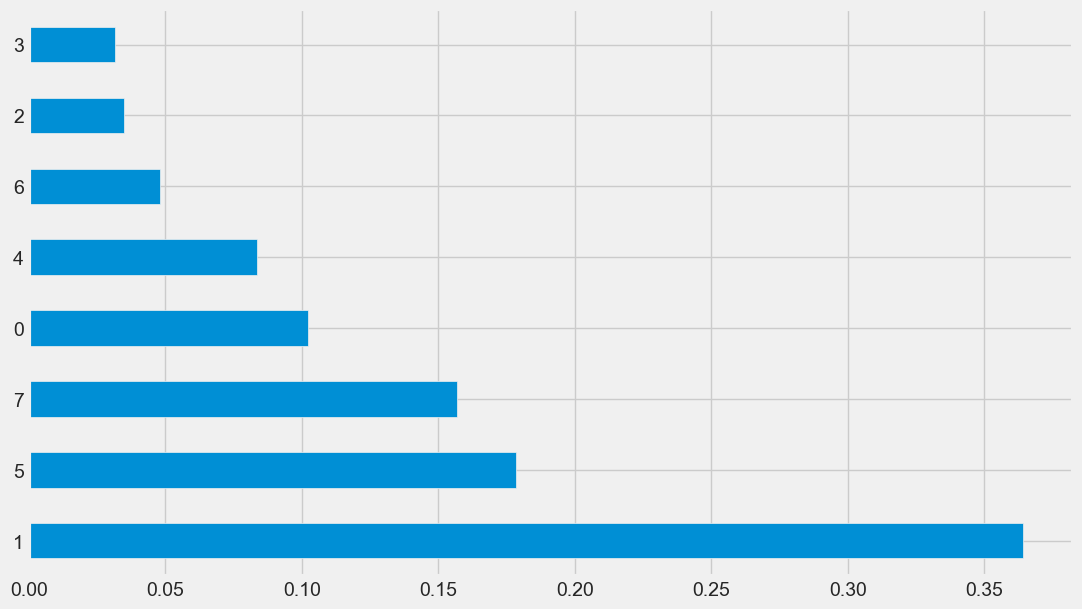

In [68]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

<AxesSubplot: >

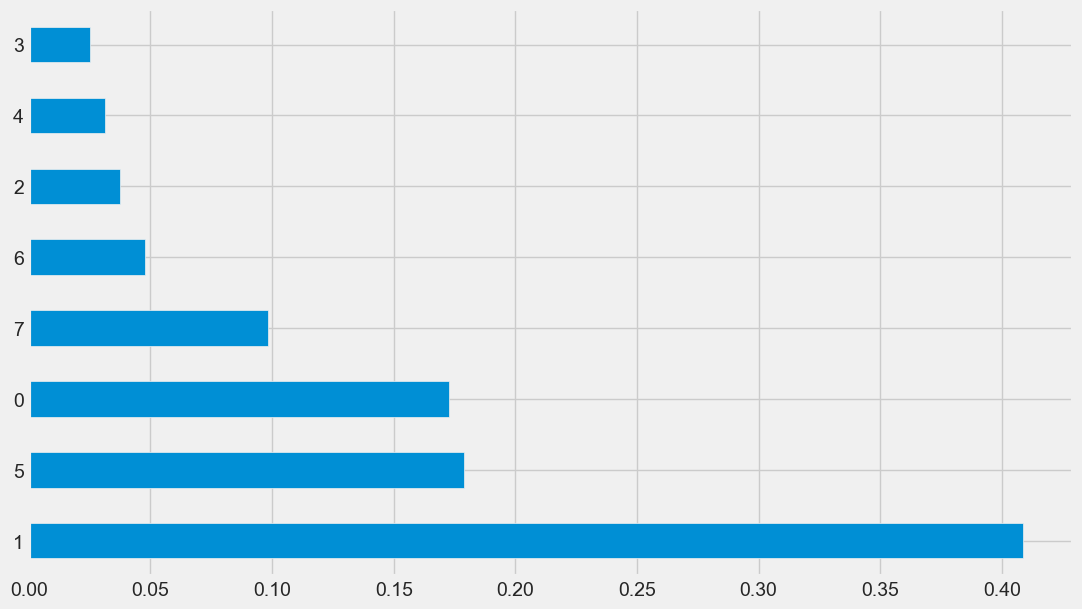

In [69]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)

## Voting Classifier supports two types of votings.

In [70]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

### Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [80]:
# Voting Classifier with hard voting 
from sklearn.ensemble import VotingClassifier

hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)  

print_score(hard_voting, X_train, y_train, X_test, y_test, train=True)
print_score(hard_voting, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.86      0.85       0.86          0.85
recall      0.94   0.68      0.85       0.81          0.85
f1-score    0.89   0.76      0.85       0.83          0.85
support   350.00 187.00      0.85     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[330  20]
 [ 59 128]]

Test Result:
Accuracy Score: 76.62%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.72      0.77       0.75          0.76
recall      0.89  0.54      0.77       0.71          0.77
f1-score    0.83  0.62      0.77       0.73          0.76
support   150.00 81.00      0.77     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[133  17]
 [ 37  44]]



In [81]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


### Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [82]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

print_score(soft_voting, X_train, y_train, X_test, y_test, train=True)
print_score(soft_voting, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.23%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.96      0.94       0.95          0.94
recall      0.98   0.87      0.94       0.92          0.94
f1-score    0.96   0.91      0.94       0.93          0.94
support   350.00 187.00      0.94     537.00        537.00
_______________________________________________
Confusion Matrix: 
 [[344   6]
 [ 25 162]]

Test Result:
Accuracy Score: 79.65%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.81  0.77      0.80       0.79          0.79
recall      0.90  0.60      0.80       0.75          0.80
f1-score    0.85  0.68      0.80       0.76          0.79
support   150.00 81.00      0.80     231.00        231.00
_______________________________________________
Confusion Matrix: 
 [[135  15]
 [ 32  49]]



In [83]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


## Averaging

In [84]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [85]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

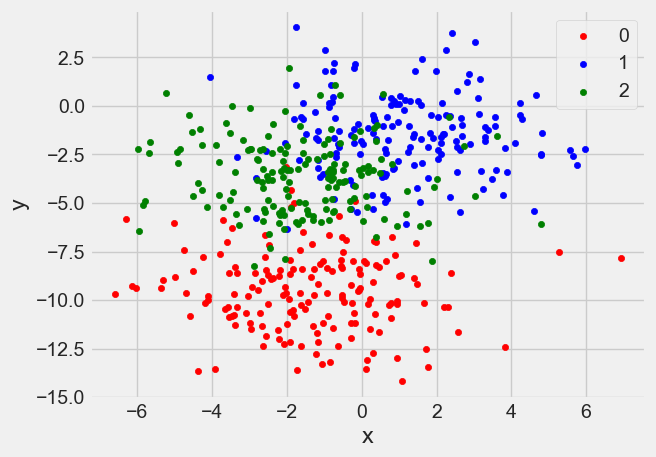

In [86]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [88]:
dataset.shape
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,0


In [89]:
dataset.groupby(['Outcome'])[['BMI']].agg(['mean','median','count'])

BMI             
         mean median count
Outcome                   
0       -0.21  -0.25   500
1        0.40   0.29   268

In [ ]:
#https://www.kaggle.com/code/pavansanagapati/ensemble-learning-techniques-tutorial